In [1]:
from passengers import *
from planes import *
from constraints import *
from main import *
from evaluation import *
from final_heuristic import *

In [2]:
TIME_LIMIT = 5
ALPHA = 0.1
SAVE = True
PLOT = False
PATH_FOR_INPUTS = "data/TestInstances/"
PATH_FOR_RESULTS = f"results{TIME_LIMIT}/"

In [3]:
dates = ["2nov","5nov","7nov", "21oct", "22oct", "23oct", "24oct", "26oct", "30oct"]

for date in dates:
    path = f'{PATH_FOR_INPUTS}{date}.csv'
    try :
        passengers, plane, passengers_on_seats, barycenter = computer_passenger_seating(path, time_limit=TIME_LIMIT, alpha=ALPHA, callback=True, name=date, path_for_results=PATH_FOR_RESULTS, save=SAVE, plot=PLOT)
    except:
        print("\n\n\nERROR : NO SOLUTIONS -> SOFT CONSTRAINTS\n\n\n")
        passengers, plane, passengers_on_seats, barycenter = computer_soft_passenger_seating(path, time_limit=TIME_LIMIT, alpha=ALPHA, callback=True, name=date, path_for_results=PATH_FOR_RESULTS, save=SAVE, plot=PLOT)

Set parameter Username
Academic license - for non-commercial use only - expires 2024-02-16
Set parameter TimeLimit to value 5
Set parameter MIPGap to value 0.7
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (mac64[arm])

CPU model: Apple M2
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 19379 rows, 19859 columns and 1591884 nonzeros
Model fingerprint: 0x8bb9b8ea
Variable types: 953 continuous, 18906 integer (18906 binary)
Coefficient statistics:
  Matrix range     [6e-03, 5e+02]
  Objective range  [5e-02, 2e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 4e+01]
Presolve removed 2644 rows and 763 columns
Presolve time: 1.85s
Presolved: 16735 rows, 19096 columns, 1117808 nonzeros
Variable types: 0 continuous, 19096 integer (18688 binary)
Deterministic concurrent LP optimizer: primal and dual simplex
Showing first log only...

Concurrent spin time: 0.00s

Solved with dual simplex

Use crossover to convert LP symmetric

2nov
Respecting constraints ? :  No
Best original metric :  171.01176470588234
Actual original metric :  122.72647058823529


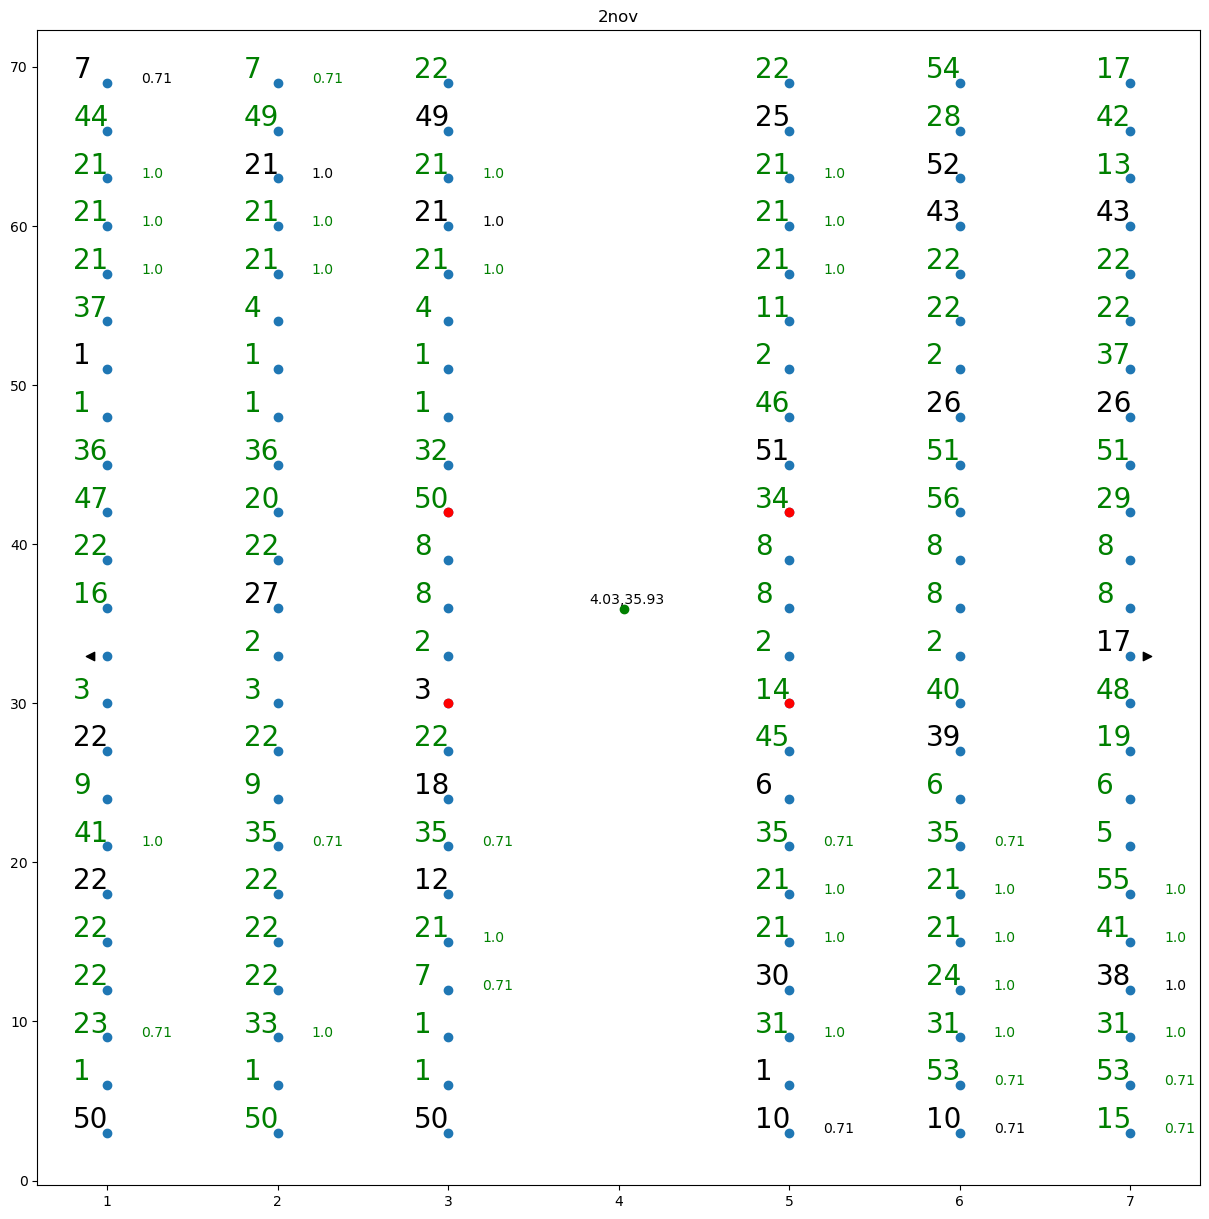

5nov
Respecting constraints ? :  Yes
Best original metric :  81.07424242424243
Actual original metric :  66.52575757575758


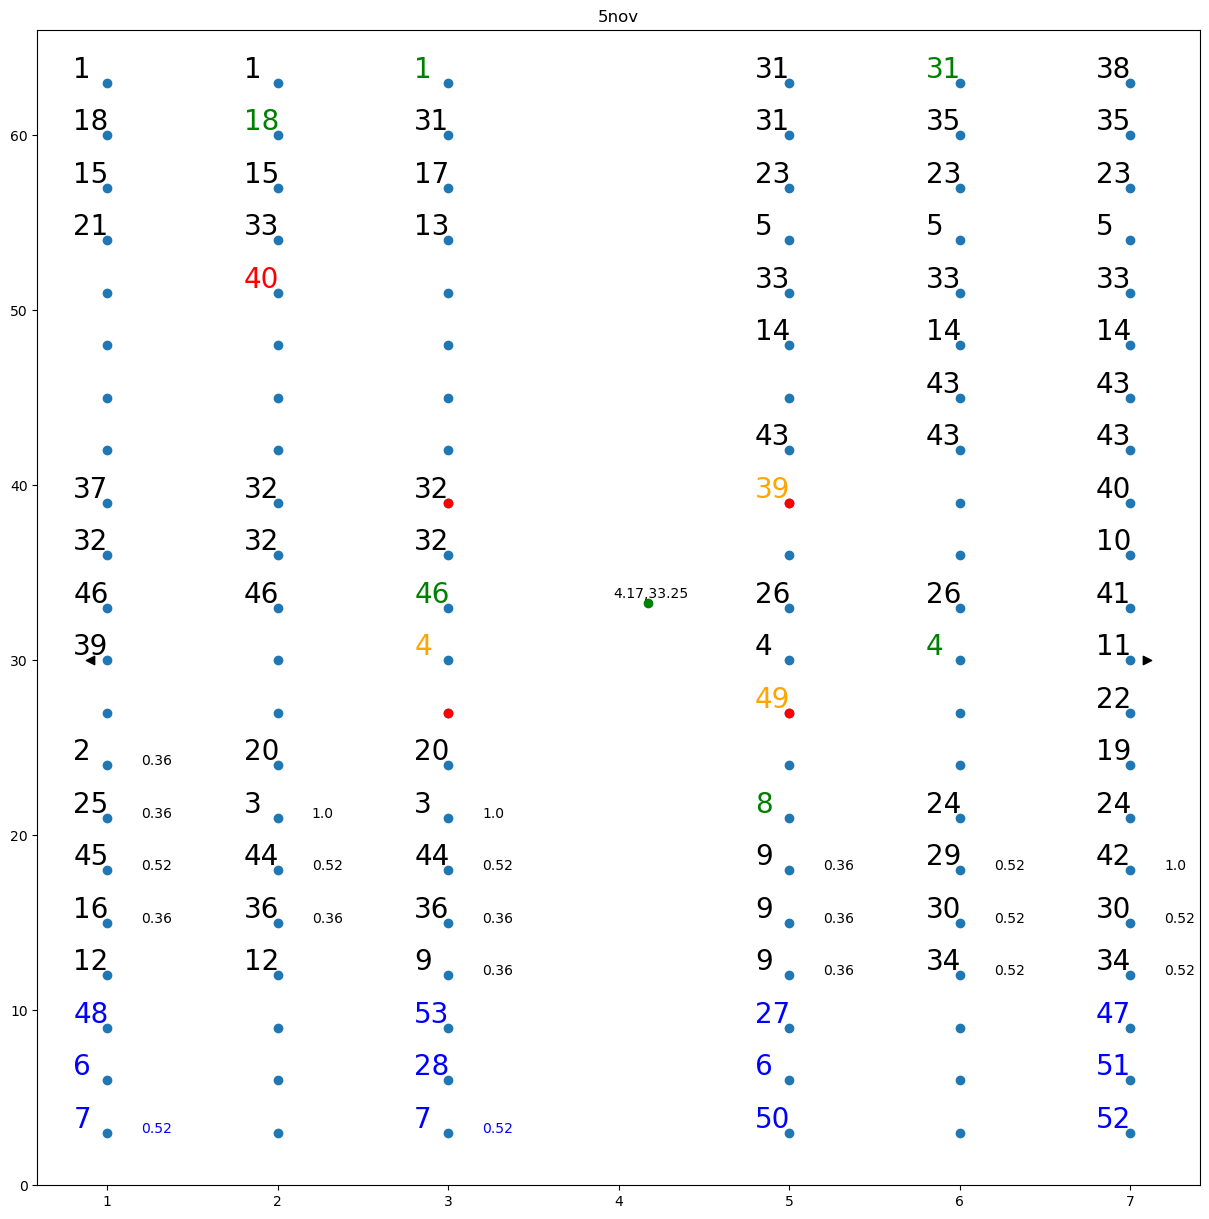

7nov
Respecting constraints ? :  No
Best original metric :  102.72407407407407
Actual original metric :  47.07499999999996


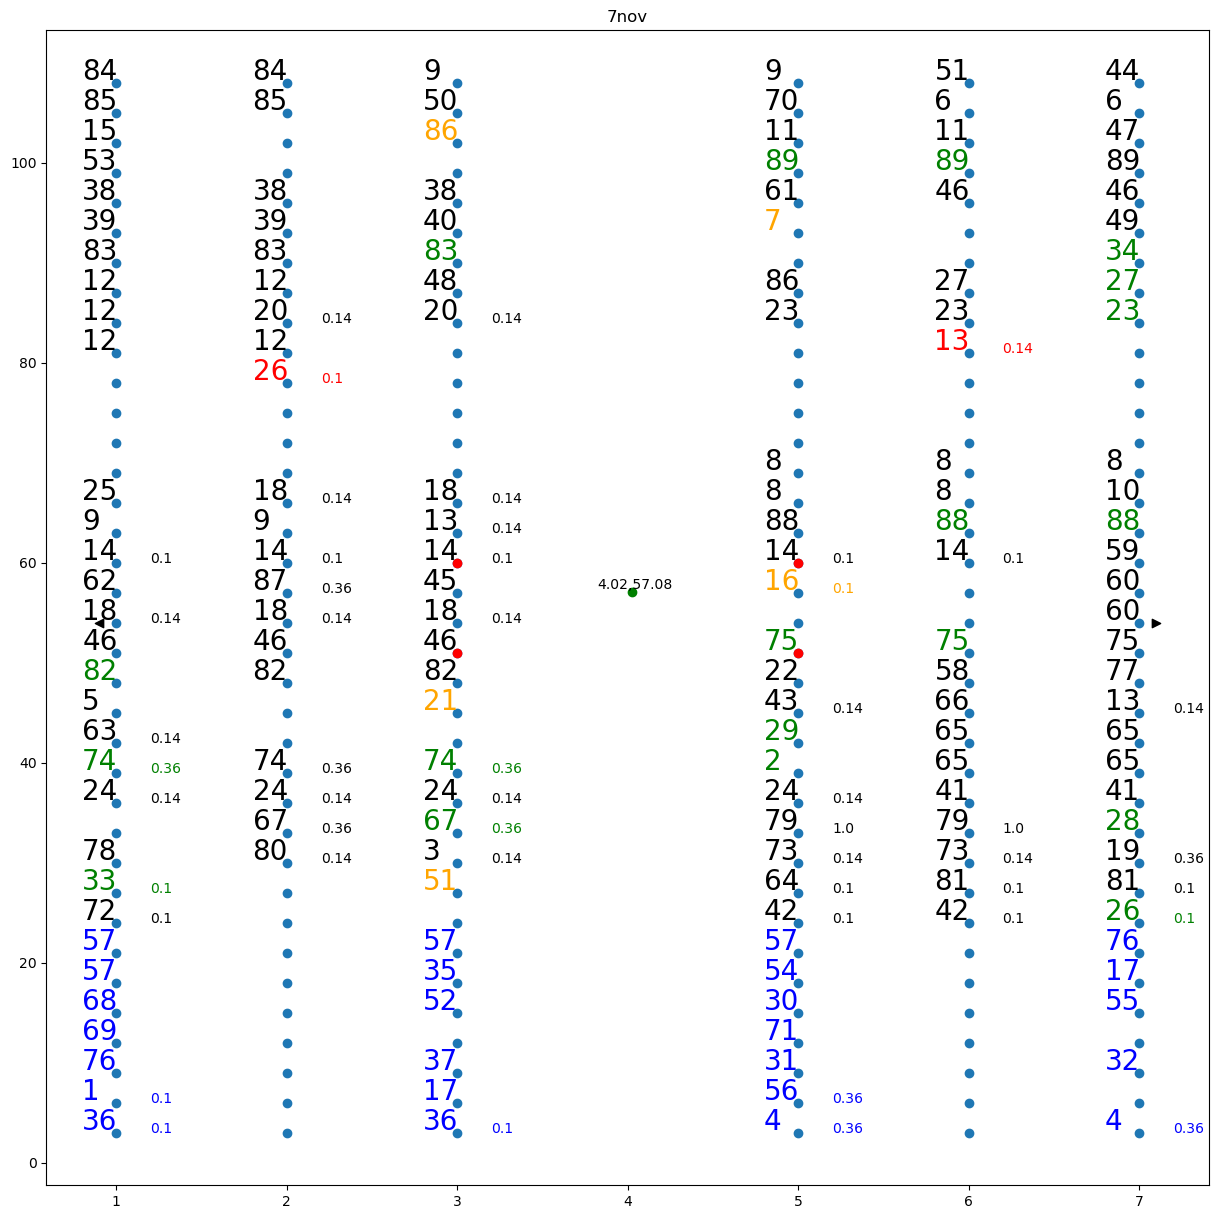

21oct
Respecting constraints ? :  Yes
Best original metric :  25.830555555555563
Actual original metric :  21.827083333333334


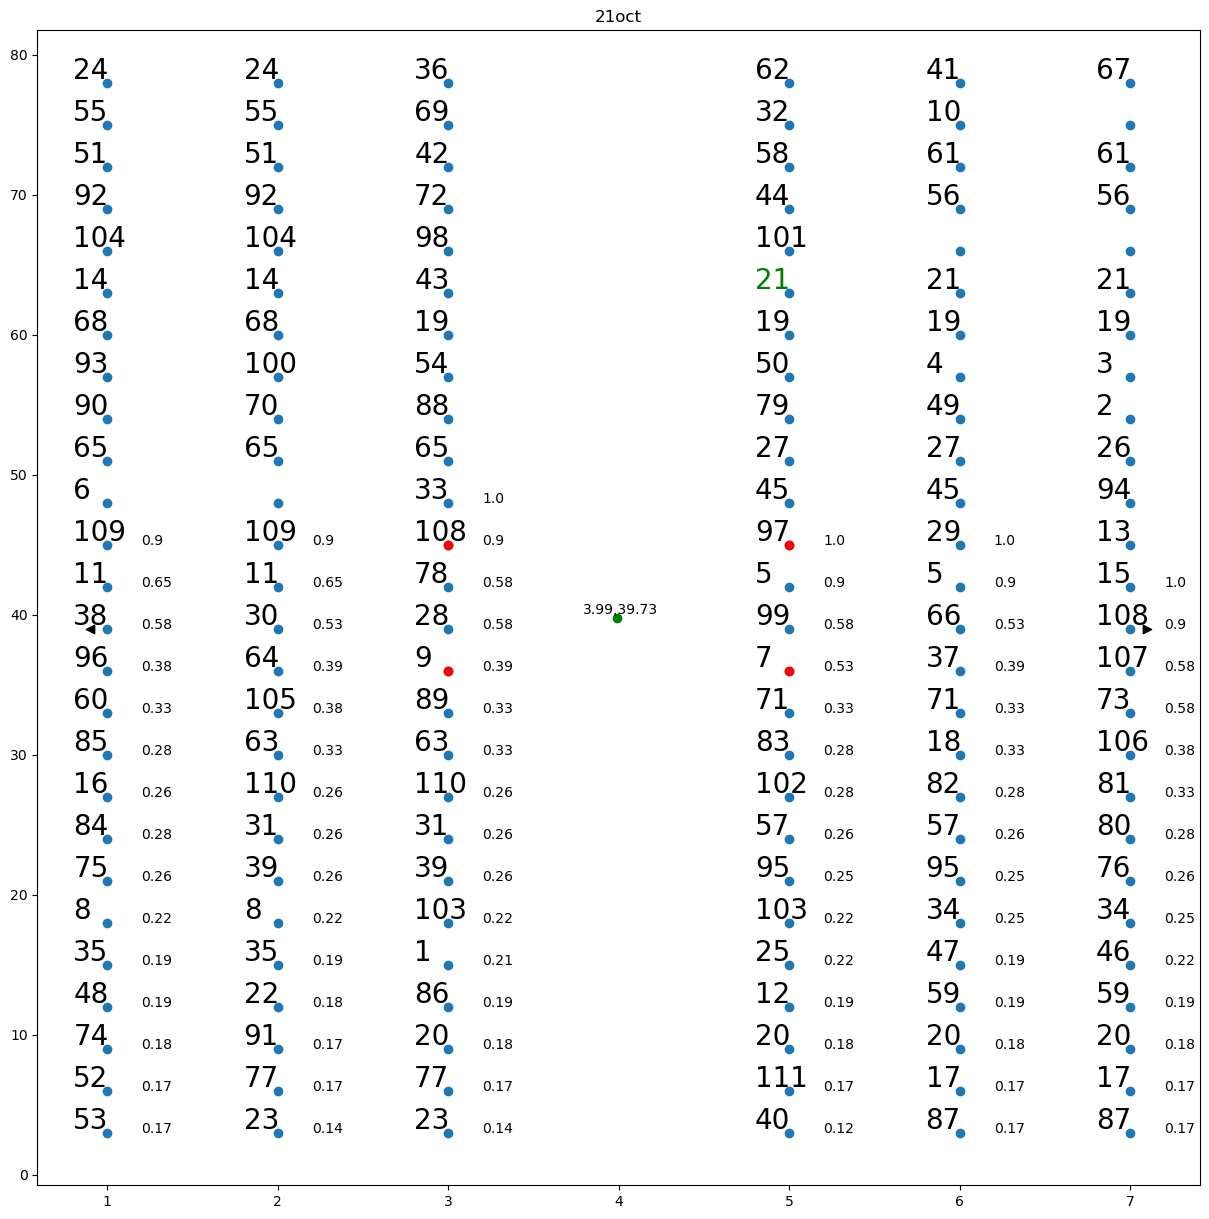

22oct
Respecting constraints ? :  Yes
Best original metric :  16.572477064220195
Actual original metric :  16.572018348623853


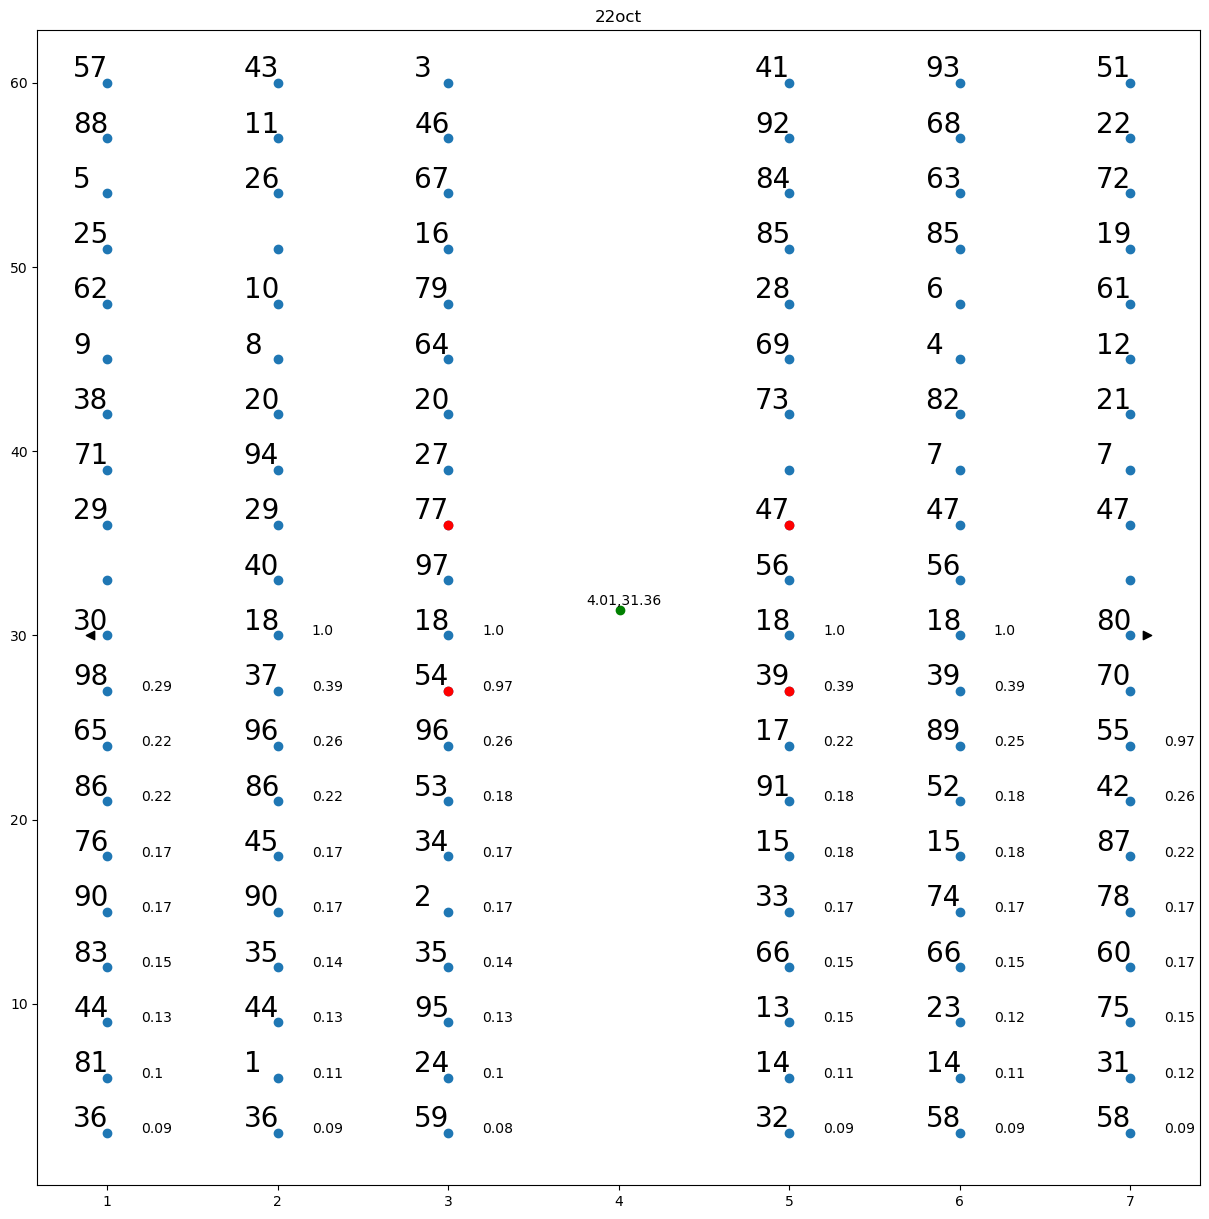

AttributeError: 'numpy.float64' object has no attribute 'replace'

In [4]:
dates = ["2nov","5nov","7nov", "21oct", "22oct", "23oct", "24oct", "26oct", "30oct"]

for date in dates:
    passengers_path = f'{PATH_FOR_INPUTS}{date}.csv'
    results_path = f'{PATH_FOR_RESULTS}{date}.csv'

    plane = get_plane_from_results(results_path)
    passengers = Passengers.compute_passengers_sets(passengers_path)
    passengers_on_seats, barycenter = get_passengers_on_seats_from_results(results_path)
    print(date)
    print("Respecting constraints ? : ", "Yes" if check_constraints(plane, passengers, passengers_on_seats) != None else "No")
    print("Best original metric : ", best_original_metric(passengers, alpha=ALPHA))
    print("Actual original metric : ", evaluate_original_metric(plane, passengers, passengers_on_seats, alpha=ALPHA))
    plot_results(passengers_path, results_path, title=date)

[104, 106]
129
[127, 129]


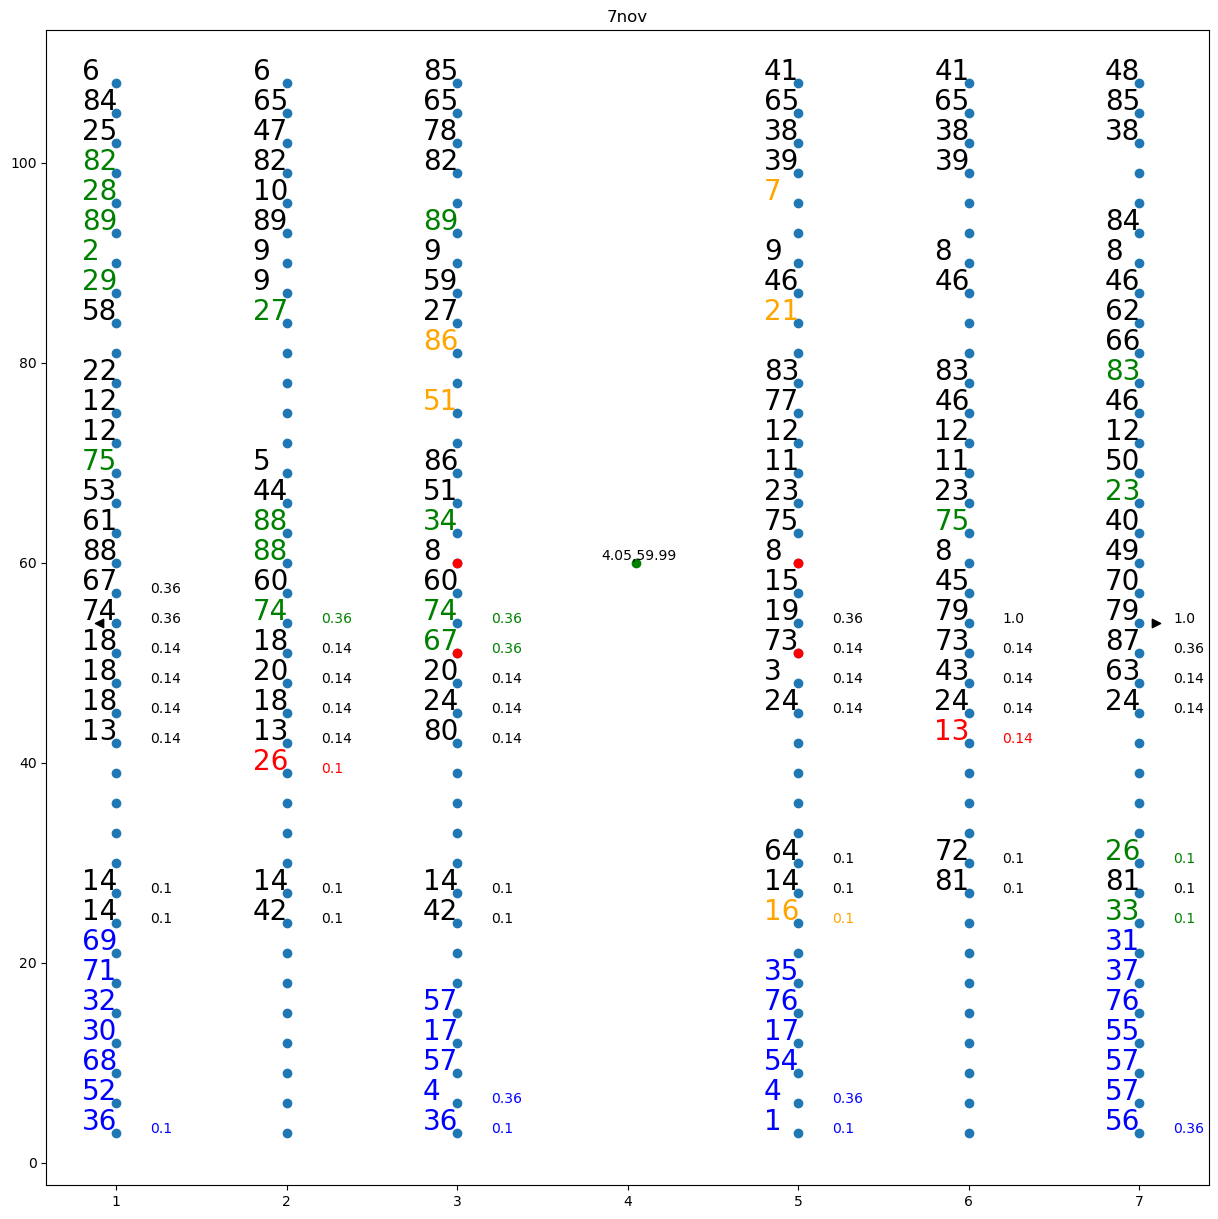

3


In [ ]:
date = "7nov"
passengers_path = f'{PATH_FOR_INPUTS}{date}.csv'
results_path = f'{PATH_FOR_RESULTS}{date}.csv'

plane = get_plane_from_results(results_path)
passengers = Passengers.compute_passengers_sets(passengers_path)
passengers_on_seats, barycenter = get_passengers_on_seats_from_results(results_path)

print(plane.child_neigh[105])
print(passengers_on_seats[105])
print(passengers.bounds[74])
plot_results(passengers_path, results_path, title=date)
print(105%6)